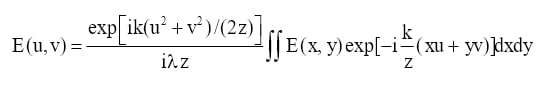

ВЕЛИЧИНЫ НЕ ЗАВИСЯЯЩИЕ ОТ КООРДИНАТ

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from math import pi

lmbda = 0.5e-6 # длина волны
k = 2*pi/lmbda # Волновое число
z = 2 # Расстояние от XY до UV (Тогда u, v береv в диапазоне [-0.01, 0.01]), чтобы диапазон углов был в [-5, 5]
m = k/z
E0 = 100

In [ ]:
# Разобъём дальнюю зону на точки, в которых считаем интенсивность
x = np.linspace(-0.001, 0.001, 2000)
y = np.linspace(-0.001, 0.001, 2000)

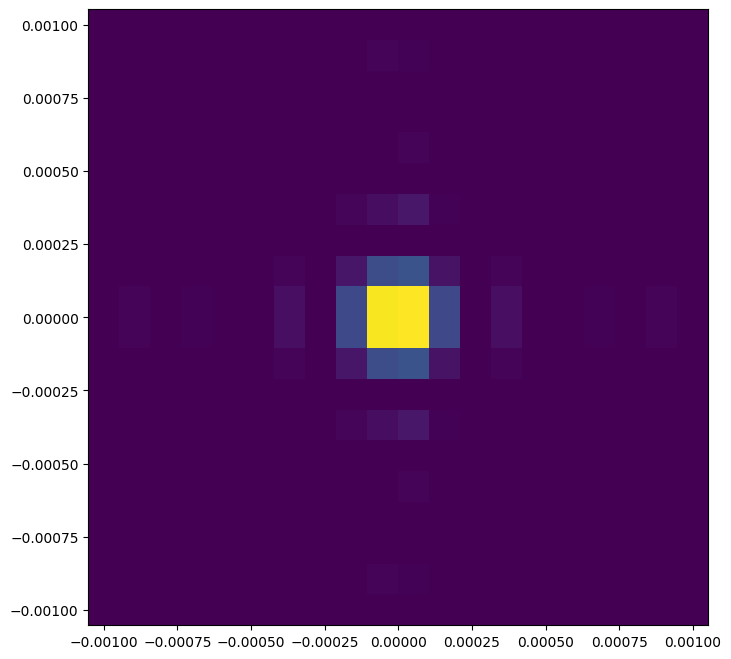

In [ ]:
import matplotlib.pylab as plt
from math import pi
import numpy as np

lmbda = 0.5e-6 # wavelength
k = 2*pi/lmbda
z = 2
m = k/z
E0 = 1

x = np.linspace(-0.001, 0.001, 20)
y = np.linspace(-0.001, 0.001, 20)
# the last parameter is responsible for splitting in the far zone
y2 = 0.002
x2 = 0.002
y1 = -0.002
x1 = -0.002

xs, ys = np.meshgrid(x, y, sparse=True)
zs = abs( (np.cos(k*(xs**2 +ys**2)/(2*z)) + np.sin(k*(xs*2 + ys**2)/(2*z)) * 1j)/(1j*lmbda*z) *
         (-1/(m*(xs*ys))) * (np.cos((x2*xs + y2*ys)*m) - 1j*np.sin((x2*xs + y2*ys)*m) -
                             np.cos((x1*xs + y2*ys)*m) + 1j*np.sin((x1*xs + y2*ys)*m) -
                             np.cos((x2*xs + y1*ys)*m) + 1j*np.sin((x2*xs + y1*ys)*m) +
                             np.cos((x1*xs + y1*ys)*m) - 1j*np.sin((x1*xs + y1*ys)*m)))**2

fig, ax = plt.subplots(figsize=(8,8))
ax.pcolormesh(xs, ys, zs, alpha = 1, cmap='viridis')
plt.show()

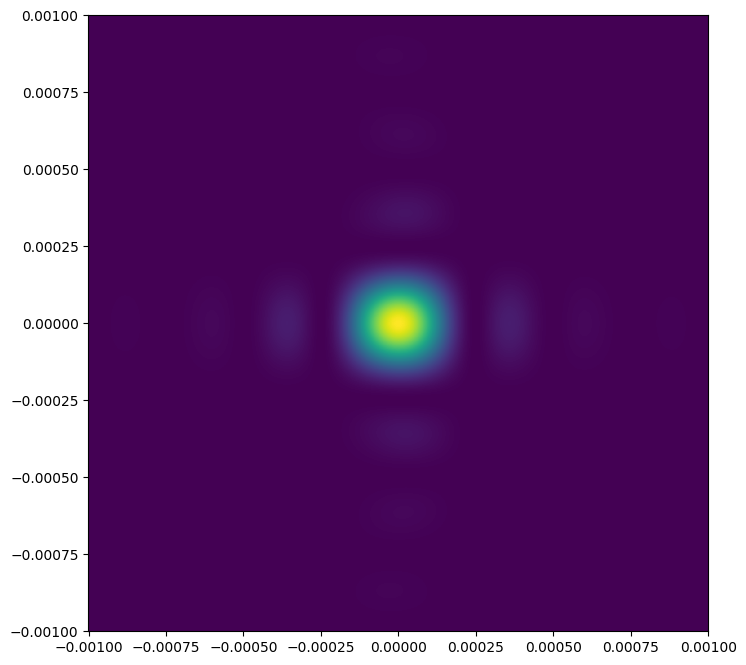

In [ ]:
# Длина стороны
a = 0.001
y20 = 2.15 * a


x2 = -2.15 * a
y10 = 1.15 * a
x1 = -1.15 * a
y2 = y20
y1 = y10
zss = 0

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from math import pi, exp

lmbda = 0.5e-6
k = 2*pi/lmbda
z = 4
m = k/z
E0 = 1

def I_0(fi, zss = 0, a=0.003):
    for i in range(4):
        zss += E0/(1j*lmbda*z) * (a**2) * (np.cos(fi[i]) + 1j*np.sin(fi[i]))
    E = abs(zss)**2
    return E

# Разобъём дальнюю зону на точки, в которых считаем интенсивность
x = np.linspace(-0.0009, 0.0009, 20)
y = np.linspace(-0.0009, 0.0009, 20)
fi = [2.22, 2.52, 2.738, 2.681]
fi_best = [0,0,0,0]
a = 0.003
y20 = 1.05 * a
x2 = -1.05 * a
y10 = 0.05 * a
x1 = -0.05 * a
y2 = y20
y1 = y10
zss = 0
# xss, yss = 0.001, 0.001
xss, yss = np.meshgrid(x, y, sparse=True)
n = 0
for i in range(2):
    for j in range(2):
        Exy = E0*(np.cos(fi[n]) + 1j*np.sin(fi[n]))
        zss += (Exy*(np.cos(k*(xss**2 +yss**2)/(2*z)) + np.sin(k*(xss*2 + yss**2)/(2*z)) * 1j)/(1j*lmbda*z) *
         (-1/(m*(xss*yss))) * (np.cos((x2*xss + y2*yss)*m) - 1j*np.sin((x2*xss + y2*yss)*m) -
                             np.cos((x1*xss + y2*yss)*m) + 1j*np.sin((x1*xss + y2*yss)*m) -
                             np.cos((x2*xss + y1*yss)*m) + 1j*np.sin((x2*xss + y1*yss)*m) +
                             np.cos((x1*xss + y1*yss)*m) - 1j*np.sin((x1*xss + y1*yss)*m)))
        n += 1 # Для каждой субаппертуры берем значение из списка fi
        y2 -= 1.1*a
        y1 -= 1.1*a
    x2 += 1.1*a
    x1 += 1.1*a
    y2 = y20
    y1 = y10
E = abs(zss)**2

I_0(fi)/I_0(fi_best)


0.9601913952630311

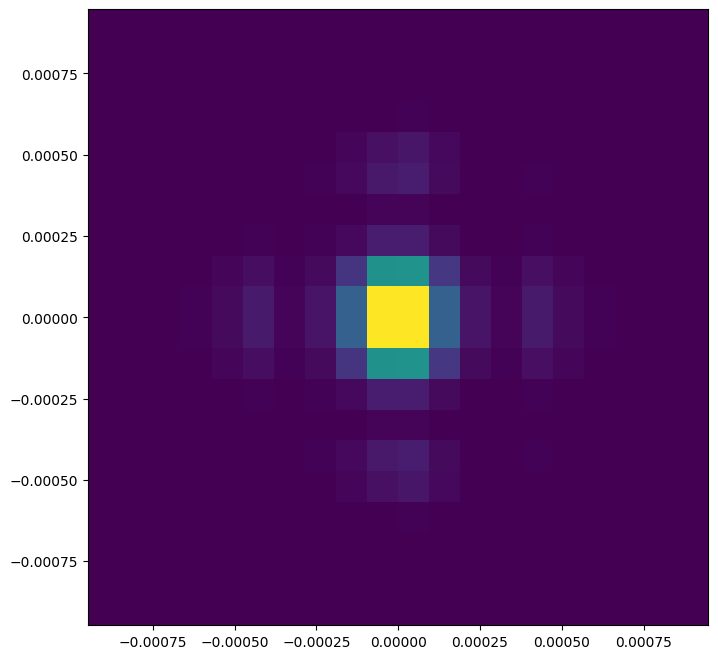

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pcolormesh(xss, yss, E, cmap=plt.get_cmap('viridis'))
plt.show()

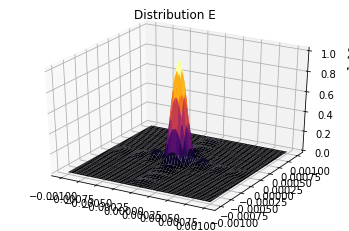

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# Название нашего объекта --необязательно
ax.set_title('Distribution E')
# Кладем фигуру в пространство с наложенным скином
ax.plot_surface(xss, yss, E, cmap='inferno')
# Смотрим, что вышло
plt.show()
